In [60]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [88]:
from sklearn.cluster import DBSCAN
import numpy as np

## Video Properties

In [62]:
video_path = "dataset_video.mp4"
cap = cv2.VideoCapture(video_path)

In [63]:
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [64]:
print(f"FPS: {fps}")
print(f"Resolution: {width}x{height}")
print(f"Total Frames: {total_frames}")

FPS: 25.0
Resolution: 1920x1080
Total Frames: 341


## Read and Display One Frame

In [65]:
ret, frame = cap.read()
cap.release()

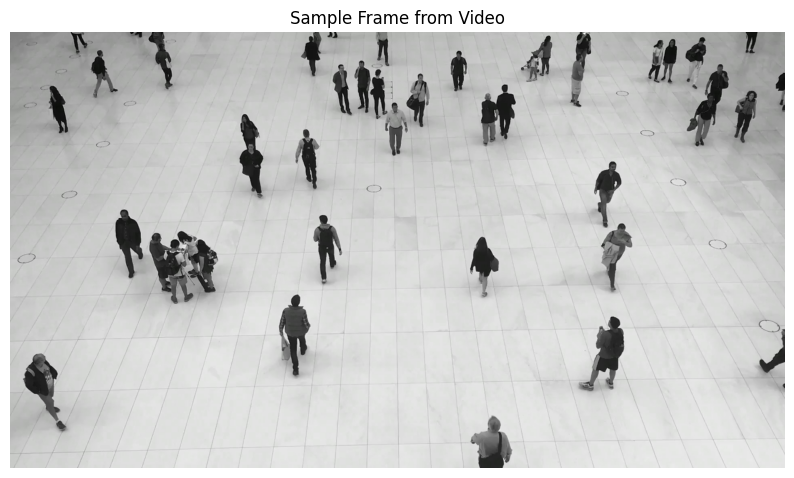

In [66]:
# convert BGR to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("Sample Frame from Video")
plt.axis("off")
plt.show()

## Load YOLO Model and detect people

In [67]:
model = YOLO("yolov8n.pt")
results = model(frame)


0: 384x640 37 persons, 2 birds, 274.8ms
Speed: 5.2ms preprocess, 274.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


In [68]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
conf: tensor([0.8196, 0.7946, 0.7787, 0.7720, 0.7463, 0.7451, 0.7429, 0.6849, 0.6117, 0.6035, 0.5948, 0.5938, 0.5876, 0.5805, 0.5667, 0.5533, 0.5449, 0.5346, 0.5329, 0.5318, 0.5230, 0.5166, 0.5095, 0.4830, 0.4786, 0.4378, 0.4205, 0.3763, 0.3573, 0.3572, 0.3482, 0.3398, 0.3244, 0.3243, 0.2975, 0.2737, 0.2612, 0.2556, 0.2508])
data: tensor([[1.4600e+03, 4.6944e+02, 1.5439e+03, 6.4138e+02, 8.1963e-01, 0.0000e+00],
        [1.4470e+03, 3.1966e+02, 1.5162e+03, 4.8018e+02, 7.9459e-01, 0.0000e+00],
        [2.5927e+02, 4.3506e+02, 3.2639e+02, 6.0953e+02, 7.7872e-01, 0.0000e+00],
        [6.6462e+02, 6.4904e+02, 7.4425e+02, 8.5106e+02, 7.7199e-01, 0.0000e+00],
        [1.1414e+03, 9.5043e+02, 1.2450e+03, 1.0800e+03, 7.4632e-01, 0.0

In [69]:
people_coords = []
bboxes = []
for box in results[0].boxes:
    cls = int(box.cls[0])
    if cls == 0:  # Person
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        people_coords.append((cx, cy))
        bboxes.append((x1, y1, x2, y2))

print(f"Detected {len(people_coords)} persons.")
print(people_coords)
print(bboxes)

Detected 37 persons.
[(1501, 555), (1481, 399), (292, 522), (704, 750), (1193, 1015), (1821, 207), (786, 534), (1227, 195), (232, 102), (736, 314), (116, 190), (1112, 96), (1700, 75), (597, 337), (911, 151), (1635, 71), (1188, 215), (952, 240), (84, 890), (874, 134), (1472, 794), (821, 139), (747, 56), (1739, 180), (372, 69), (1600, 70), (1609, 69), (1750, 139), (595, 245), (369, 567), (1908, 149), (1321, 59), (1884, 777), (486, 574), (1010, 165), (1622, 71), (1724, 218)]
[(1460, 469, 1543, 641), (1447, 319, 1516, 480), (259, 435, 326, 609), (664, 649, 744, 851), (1141, 950, 1245, 1080), (1793, 144, 1850, 271), (750, 450, 822, 619), (1200, 126, 1255, 265), (198, 44, 266, 160), (709, 242, 764, 386), (88, 128, 144, 252), (1091, 46, 1133, 147), (1674, 11, 1726, 139), (566, 271, 628, 404), (892, 93, 930, 210), (1615, 16, 1655, 127), (1163, 151, 1213, 279), (925, 174, 979, 306), (31, 792, 137, 989), (854, 72, 894, 196), (1419, 702, 1525, 886), (798, 75, 844, 203), (725, 5, 770, 108), (1699,

## Visualise Bounding Box

In [70]:
frame_copy = frame.copy()

In [71]:
for (x1, y1, x2, y2), (cx, cy) in zip(bboxes, people_coords):
    cv2.rectangle(frame_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.circle(frame_copy, (cx, cy), 4, (0, 0, 255), -1)

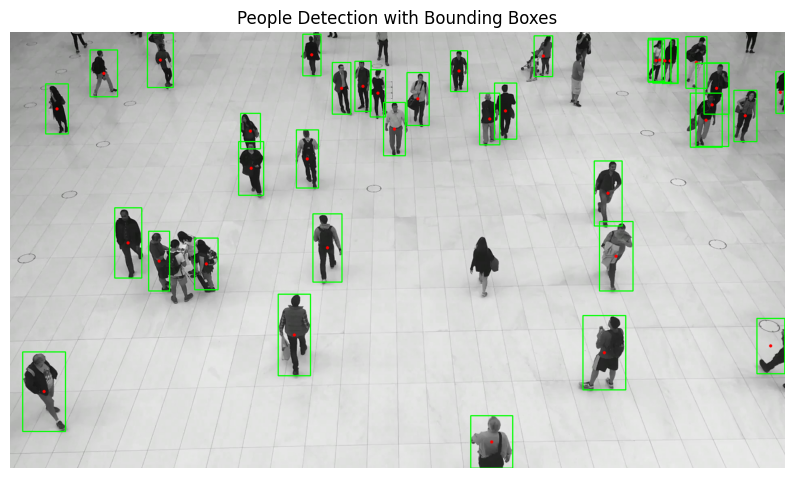

In [72]:
# Show frame with annotations
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
plt.title("People Detection with Bounding Boxes")
plt.axis("off")
plt.show()

## DBSCAN Clustering for Group Detection

In [115]:
def cluster_crowds_with_dbscan(coords, distance_threshold=60, min_people=3):
  if len(coords) < min_people:
    return []
  coords_np = np.array(coords)
  db = DBSCAN(eps=distance_threshold, min_samples=min_people).fit(coords_np)
  labels = db.labels_
  unique_labels = set(labels)
  groups = []
  for label in unique_labels:
    if label == -1:
      continue  # -1 means noise
    group = [i for i, lbl in enumerate(labels) if lbl == label]
    if len(group) >= min_people:
      groups.append(group)
  return groups

In [116]:
crowd_groups = cluster_crowds_with_dbscan(people_coords, distance_threshold=60, min_people=3)
print(f"DBSCAN: Detected {len(crowd_groups)} crowd group(s).")

DBSCAN: Detected 3 crowd group(s).


## Highlight Crowd Members in Red

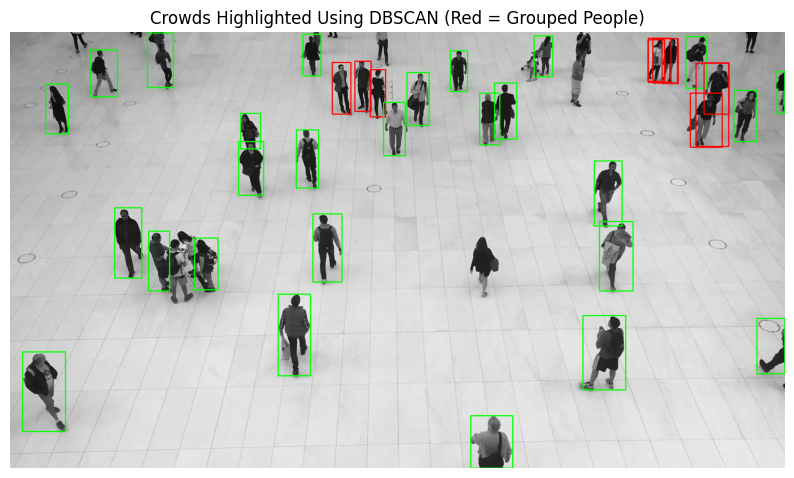

In [117]:
frame_crowd = frame.copy()
crowd_indices = set(idx for group in crowd_groups for idx in group)

for i, ((x1, y1, x2, y2)) in enumerate(bboxes):
    color = (0, 255, 0)  # Green = not in crowd
    if i in crowd_indices:
        color = (0, 0, 255)  # Red = in crowd
    cv2.rectangle(frame_crowd, (x1, y1), (x2, y2), color, 2)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(frame_crowd, cv2.COLOR_BGR2RGB))
plt.title("Crowds Highlighted Using DBSCAN (Red = Grouped People)")
plt.axis("off")
plt.show()